In [10]:
pip install folium



   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 435.7 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.4 kB 651.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 785.4 kB/s eta 0:00:00


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
data = pd.read_csv("C:/Users/user/Downloads/accident.csv")

# Strip and replace spaces in column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Inspect the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop missing values if necessary
data = data.dropna()

# Verify column names
print(data.columns)

  Age_band_of_driver Sex_of_driver   Educational_level  \
0              18-30          Male   Above high school   
1              31-50          Male  Junior high school   
2              18-30          Male  Junior high school   
3              18-30          Male  Junior high school   
4              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience   Lanes_or_Medians  \
0                Employee              1-2yr            Unknown   
1                Employee         Above 10yr  Undivided Two way   
2                Employee              1-2yr              other   
3                Employee             5-10yr              other   
4                Employee              2-5yr              other   

  Types_of_Junction Road_surface_type       Light_conditions  \
0       No junction     Asphalt roads               Daylight   
1       No junction     Asphalt roads               Daylight   
2       No junction     Asphalt roads               Dayl

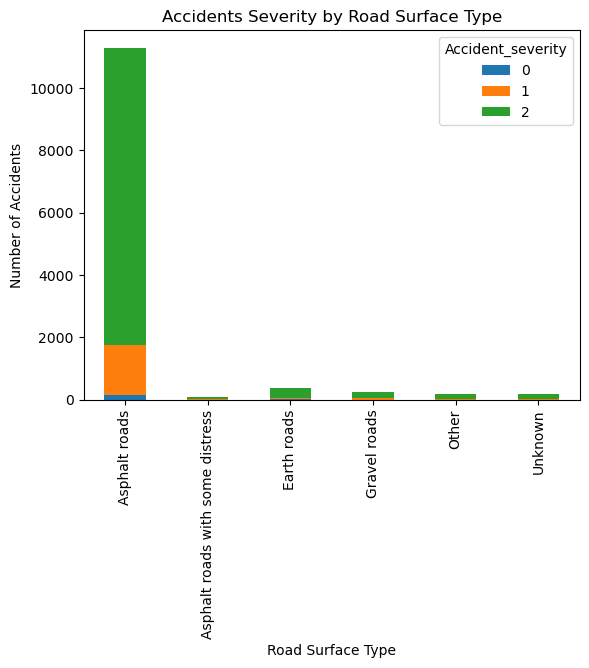

In [12]:
# Analyze road conditions
if 'Road_surface_type' in data.columns and 'Accident_severity' in data.columns:
    road_surface_counts = data.groupby('Road_surface_type')['Accident_severity'].value_counts().unstack()
    road_surface_counts.plot(kind='bar', stacked=True)
    plt.title('Accidents Severity by Road Surface Type')
    plt.xlabel('Road Surface Type')
    plt.ylabel('Number of Accidents')
    plt.show()

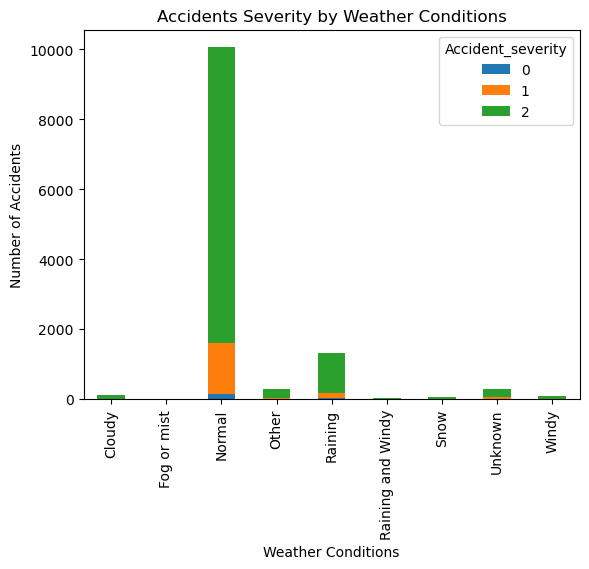

In [13]:
# Analyze weather conditions
if 'Weather_conditions' in data.columns and 'Accident_severity' in data.columns:
    weather_counts = data.groupby('Weather_conditions')['Accident_severity'].value_counts().unstack()
    weather_counts.plot(kind='bar', stacked=True)
    plt.title('Accidents Severity by Weather Conditions')
    plt.xlabel('Weather Conditions')
    plt.ylabel('Number of Accidents')
    plt.show()

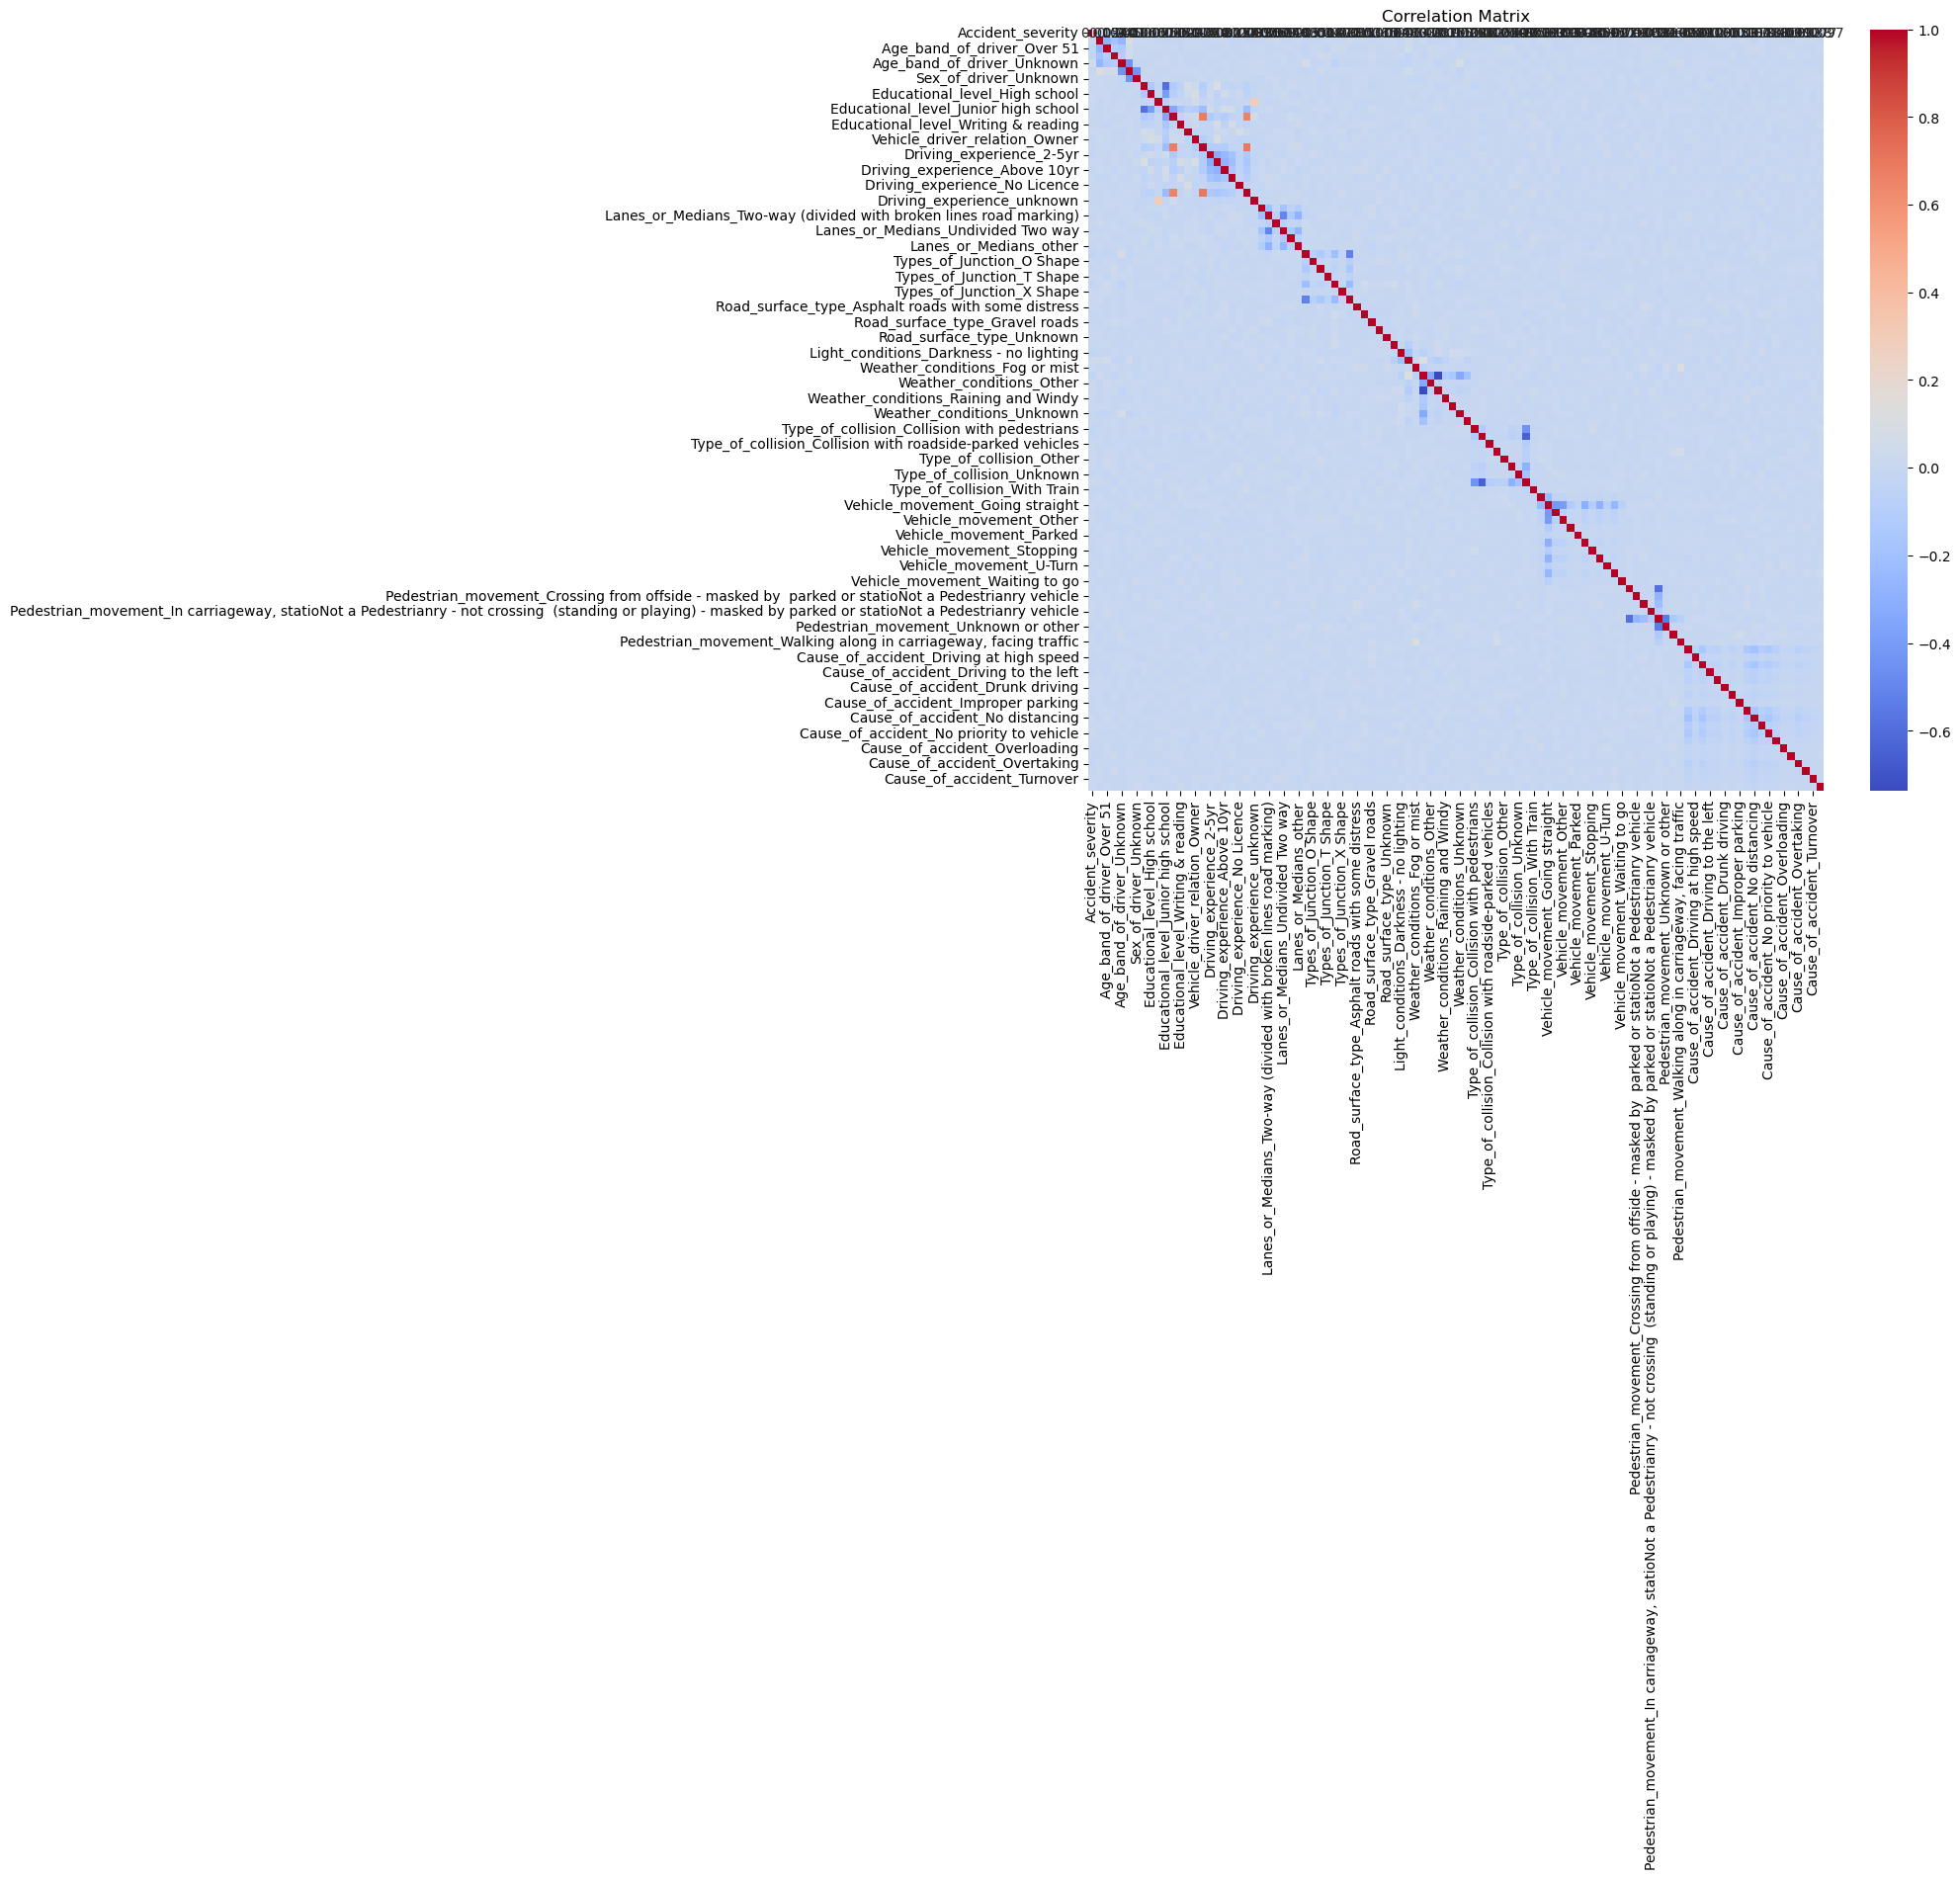

In [16]:
# Correlation analysis
data_numeric = pd.get_dummies(data, drop_first=True)
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
